### **FPCC2 - LABORATÓRIO 1**

** **Professor**: Fabio Jorge Almeida Morais*

** **Aluna**: Lana Yara do Nascimento Bem*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import pandas as pd

In [6]:
cursos_prouni = pd.read_csv('/content/drive/MyDrive/FPCC2_Lab/cursos-prouni.csv', encoding='UTF-8')
estados = pd.read_csv('/content/drive/MyDrive/FPCC2_Lab/estados.csv', encoding='UTF-8')

*Os resultados são apresentado em tabelas e gráficos de barra horizontal ou vertical (são mais fáceis de ler, especialmente quando há muitas categorias ou quando os nomes das categorias são longos). Também são mostrados em gráfico de barras empilhadas horizontal. Este gráfico é particularmente útil quando se deseja comparar a distribuição de categorias dentro de um conjunto maior de dados, mantendo a capacidade de visualizar o total combinado. A bilioteca Plotly, usada para visualizações, permite criar gráficos interativos que podem ser explorados com recursos como zoom, pan e tooltips personalizáveis que exibem informações adicionais ao passar o mouse sobre os elementos do gráfico.*

Para unir os dois conjuntos de dados (cursos-prouni.csv e estados.csv) pelas colunas 'uf_busca [cursos-prouni]' e 'subdivision [estados]', é necesário remover as linhas onde 'subdivision' contém valores que não são, atualmente, códigos de estados brasileiros. Após, une-se os dois conjuntos de dados.

In [7]:
#valores presentes nas colunas 'uf_bsuca' e 'subdivision'
print("Valores únicos na coluna 'uf_busca':")
print(cursos_prouni['uf_busca'].unique())

print("\nValores únicos na coluna 'subdivision':")
print(estados['subdivision'].unique())

Valores únicos na coluna 'uf_busca':
['MS' 'CE' 'SP' 'AC' 'MG' 'MT' 'BA' 'RJ' 'PA' 'PR' 'PI' 'PB' 'RS' 'MA'
 'TO' 'AL' 'PE' 'SC' 'RO' 'DF' 'RN' 'SE' 'GO' 'ES' 'AP' 'AM' 'RR']

Valores únicos na coluna 'subdivision':
['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO' 'FN'
 'GB' 'GU' 'IG' 'PP' 'RB']


In [8]:
#incluindo apenas as linhas onde os valores da coluna subdivision estão presentes nos valores únicos da coluna uf_busca
estados = estados[estados['subdivision'].isin(cursos_prouni['uf_busca'].unique())]

In [9]:
print("Valores únicos na coluna 'uf_busca':")
print(cursos_prouni['uf_busca'].unique())

print("\nValores únicos na coluna 'subdivision':")
print(estados['subdivision'].unique())

Valores únicos na coluna 'uf_busca':
['MS' 'CE' 'SP' 'AC' 'MG' 'MT' 'BA' 'RJ' 'PA' 'PR' 'PI' 'PB' 'RS' 'MA'
 'TO' 'AL' 'PE' 'SC' 'RO' 'DF' 'RN' 'SE' 'GO' 'ES' 'AP' 'AM' 'RR']

Valores únicos na coluna 'subdivision':
['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [10]:
merged = pd.merge(cursos_prouni, estados, left_on='uf_busca', right_on='subdivision')

*O conjunto de dados cursos-prouni.csv tem duas nomenclaturas para o mesmo curso, a saber: Ciência da Computação e Ciência**s** da Computação. Por isso, os filtros de busca foram todos feitos considerando essa mudança.*  

In [11]:
# Filtrar cursos apenas da região Nordeste que contenham "Ciência da Computação" ou "Ciências da Computação" no nome do curso
cursos_ciencia_computacao_nordeste = merged[(merged['region'] == 'NE') & (merged['curso_busca'].str.contains('Ciência[s]* da Computação'))]
cursos_ciencia_computacao_sudeste = merged[(merged['region'] == 'SE') & (merged['curso_busca'].str.contains('Ciência[s]* da Computação'))]

In [12]:
# Obtém os valores únicos da coluna 'uf_busca'
regioes_ciencia_computacao = cursos_ciencia_computacao_nordeste['uf_busca'].unique()
regioes_ciencia_computacao = cursos_ciencia_computacao_sudeste['uf_busca'].unique()

### ***Questão 01 - Qual a diferença entre as mensalidades médias e medianas dos cursos de Ciência da Computação das regiões Nordeste e Sudeste? Na sua opinião, o que causa essa diferença? Ela é estatisticamente significativa? Justifique.***

In [13]:
# Calcula a soma total dos valores das mensalidades para todos os cursos de Ciência da Computação na região Nordeste
soma_mensalidades = cursos_ciencia_computacao_nordeste['mensalidade'].sum()

# Conta o número total de cursos de Ciência da Computação na região Nordeste
total_cursos = cursos_ciencia_computacao_nordeste.shape[0]

# Calcula a média dos valores das mensalidades para todos os cursos de Ciência da Computação na região Nordeste
media_mensalidades_nordeste = soma_mensalidades / total_cursos

# Calcula a mediana dos valores das mensalidades para todos os cursos de Ciência da Computação na região Nordeste
mediana_mensalidades_nordeste = cursos_ciencia_computacao_nordeste['mensalidade'].median()

In [14]:
# Cria um DataFrame com os dados
dados = {
    'Estatística': ['Média', 'Mediana'],
    'Valor (R$)': [media_mensalidades_nordeste, mediana_mensalidades_nordeste]
}
df = pd.DataFrame(dados)

df['Valor (R$)'] = df['Valor (R$)'].map('{:.2f}'.format)

df_styled = df.style.set_properties(**{'text-align': 'center', 'width': '300px'}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center')]),
      dict(selector='caption', props=[('font-size', '16px'), ('font-weight', 'bold')])]
).set_caption("Mensalidades dos Cursos de Ciência da Computação na Região Nordeste")

df_styled.set_table_attributes('style="width:100%;"')
df_styled

,Estatística,Valor (R$)
0,Média,704.80
1,Mediana,677.83


In [15]:
#Os mesmos cálculos para a região Sudeste
soma_mensalidades = cursos_ciencia_computacao_sudeste['mensalidade'].sum()
total_cursos = cursos_ciencia_computacao_sudeste.shape[0]
media_mensalidades_sudeste = soma_mensalidades / total_cursos
mediana_mensalidades_sudeste = cursos_ciencia_computacao_sudeste['mensalidade'].median()

In [16]:
# Criar um DataFrame com os dados
dados = {
    'Estatística': ['Média', 'Mediana'],
    'Valor (R$)': [media_mensalidades_sudeste, mediana_mensalidades_sudeste]
}
df = pd.DataFrame(dados)

df['Valor (R$)'] = df['Valor (R$)'].map('{:.2f}'.format)

df_styled = df.style.set_properties(**{'text-align': 'center', 'width': '300px'}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center')]),
      dict(selector='caption', props=[('font-size', '16px'), ('font-weight', 'bold')])]
).set_caption("Mensalidades dos Cursos de Ciência da Computação na Região Sudeste")

df_styled.set_table_attributes('style="width:100%;"')
df_styled

,Estatística,Valor (R$)
0,Média,893.32
1,Mediana,758.00


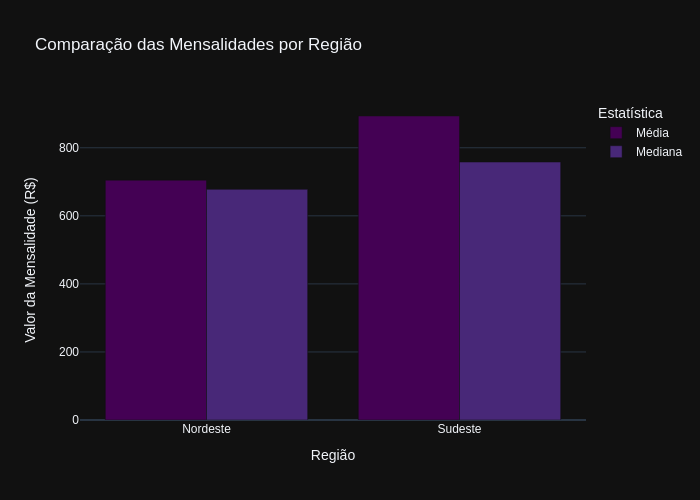

In [17]:
import plotly.express as px
import os
# Criar um DataFrame com os dados
dados = {
    'Região': ['Nordeste', 'Nordeste', 'Sudeste', 'Sudeste'],
    'Estatística': ['Média', 'Mediana', 'Média', 'Mediana'],
    'Valor': [media_mensalidades_nordeste, mediana_mensalidades_nordeste,
              media_mensalidades_sudeste, mediana_mensalidades_sudeste]
}
df = pd.DataFrame(dados)

fig = px.bar(df, x='Região', y='Valor', color='Estatística', barmode='group',
             title='Comparação das Mensalidades por Região',
             labels={'Valor': 'Valor da Mensalidade (R$)', 'Região': 'Região'},
             template='plotly_dark',
             color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_xaxes(title_text='Região')
fig.update_yaxes(title_text='Valor da Mensalidade (R$)')

# Verifique se o diretório 'images' existe, se não, crie-o
if not os.path.exists("images"):
    os.mkdir("images")

# Salve o gráfico como uma imagem PNG
fig.write_image("images/comparacao_mensalidades.png")
fig.show()

from IPython.display import Image
caminho_imagem = "images/comparacao_mensalidades.png"
Image(filename=caminho_imagem)

*Cálculo do desvio padrão com o objetivo de posteriormente calcular a significância estatística.*



In [18]:
# Calcula o desvio padrão das mensalidades para esses cursos
std_mensalidades_nordeste = cursos_ciencia_computacao_nordeste['mensalidade'].std()
std_mensalidades_sudeste = cursos_ciencia_computacao_sudeste['mensalidade'].std()
std_mensalidades_formatado_N = round(std_mensalidades_nordeste, 2)
std_mensalidades_formatado_S = round(std_mensalidades_sudeste, 2)

print(f"O desvio padrão das mensalidades dos cursos de Ciência da Computação na região Nordeste é {std_mensalidades_formatado_N:.2f}.\n")
print(f"O desvio padrão das mensalidades dos cursos de Ciência da Computação na região Sudeste é {std_mensalidades_formatado_S:.2f}.")



O desvio padrão das mensalidades dos cursos de Ciência da Computação na região Nordeste é 234.71.

O desvio padrão das mensalidades dos cursos de Ciência da Computação na região Sudeste é 446.76.


*Calculando a significância estatística da diferença entre as mensalidades médias e medianas dos cursos de Ciência da Computação nas regiões Nordeste e Sudeste*

In [19]:
from scipy import stats
total_cursos_sudeste = cursos_ciencia_computacao_sudeste.shape[0]
total_cursos_nordeste = cursos_ciencia_computacao_nordeste.shape[0]

# Calcula o teste t para a média das mensalidades
t_test_media = stats.ttest_ind_from_stats(mean1=media_mensalidades_nordeste, std1=std_mensalidades_formatado_N, nobs1=total_cursos_nordeste,
                                          mean2=media_mensalidades_sudeste, std2=std_mensalidades_formatado_S, nobs2=total_cursos_sudeste)

# Calcula o teste t para a mediana das mensalidades
t_test_mediana = stats.ttest_ind_from_stats(mean1=mediana_mensalidades_nordeste, std1=std_mensalidades_formatado_N, nobs1=total_cursos_nordeste,
                                            mean2=mediana_mensalidades_sudeste, std2=std_mensalidades_formatado_S, nobs2=total_cursos_sudeste)
# Avalia a significância estatística
alpha = 0.05  # Nível de significância
if t_test_media.pvalue < alpha:
    print("A diferença entre as médias das mensalidades é estatisticamente significativa.\n")
else:
    print("A diferença entre as médias das mensalidades não é estatisticamente significativa.")
if t_test_mediana.pvalue < alpha:
    print("A diferença entre as medianas das mensalidades é estatisticamente significativa.")
else:
    print("A diferença entre as medianas das mensalidades não é estatisticamente significativa.")

A diferença entre as médias das mensalidades é estatisticamente significativa.

A diferença entre as medianas das mensalidades não é estatisticamente significativa.


1. **Média das Mensalidades:**
   - Região Nordeste: Média das mensalidades é **R$ 704.80**.

   - Região Sudeste: Média das mensalidades é **R$ 893.32**.
   - Diferença: A média das mensalidades na região Sudeste é **maior** do que na região Nordeste.

2. **Mediana das Mensalidades:**
   - Região Nordeste: Mediana das mensalidades é **R$ 677.83**.
   
   - Região Sudeste: Mediana das mensalidades é **R$ 758.00**.
   - Diferença: A mediana das mensalidades na região Sudeste também é **maior** do que na região Nordeste.

**Causas Possíveis:**
- **Variação de Custos:** A diferença pode ser atribuída a variações nos custos de ensino, infraestrutura e localização entre as duas regiões.
- **Demanda e Oferta:** A demanda e oferta por cursos de Ciência da Computação podem ser diferentes nas regiões, afetando os preços.
- **Qualidade Percebida:** A percepção de qualidade dos cursos pode influenciar os valores cobrados.

Ou seja, as causas para essas diferenças podem incluir fatores como o custo de vida, a demanda por cursos de Ciência da Computação, a qualidade das instituições de ensino e a renda média das famílias nas respectivas regiões. Por exemplo, o custo de vida geralmente é mais alto em alguns lugares da região Sudeste, o que pode levar a mensalidades mais altas. Além disso, instituições de ensino com maior prestígio ou melhor infraestrutura podem cobrar mais por seus cursos.

**Significância Estatística:**
- A diferença entre as médias é estatisticamente significativa, indicando que há uma diferença real entre as médias das mensalidades.
- No entanto, a diferença entre as medianas não é estatisticamente significativa, o que sugere que a distribuição das mensalidades pode ser semelhante em ambas as regiões.

Em resumo, a diferença nas mensalidades entre as regiões é real e estatisticamente significativa para a média, mas não para a mediana. Essa diferença pode ser influenciada por diversos fatores, à exemplo, econômicos e educacionais.

### ***Q2 - Quais são os top 10 cursos com maior valor de mensalidade pelo total de bolsas (diferentes tipos)? Existe uma relação entre o valor total de mensalidade e o total de bolsas por curso? Justifique.***

In [20]:
import pandas as pd
merged['bolsa_integral_cotas'] = pd.to_numeric(merged['bolsa_integral_cotas'], errors='coerce').fillna(0)
merged['bolsa_integral_ampla'] = pd.to_numeric(merged['bolsa_integral_ampla'], errors='coerce').fillna(0)
merged['bolsa_parcial_cotas'] = pd.to_numeric(merged['bolsa_parcial_cotas'], errors='coerce').fillna(0)
merged['bolsa_parcial_ampla'] = pd.to_numeric(merged['bolsa_parcial_ampla'], errors='coerce').fillna(0)

# Calcula o total de bolsas para cada curso
merged['total_bolsas'] = (merged['bolsa_integral_cotas'] + merged['bolsa_integral_ampla'] +
                          merged['bolsa_parcial_cotas'] + merged['bolsa_parcial_ampla']).astype(int)
# Agrupa os cursos pelo nome e some as bolsas e a média da mensalidade para cada grupo
grouped_df = merged.groupby('curso_busca').agg({
    'total_bolsas': 'sum',
    'mensalidade': 'mean'
}).reset_index()

# Ordena os grupos pela 'total_bolsas' em ordem decrescente e selecione os 10 primeiros
top10_cursos = grouped_df.sort_values(by='total_bolsas', ascending=False).head(10)

top10_cursos['mensalidade'] = top10_cursos['mensalidade'].map('{:.2f}'.format)

top10_cursos_styled = top10_cursos.style.set_properties(**{'text-align': 'center', 'width': '300px'}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center')]),
      dict(selector='caption', props=[('font-size', '16px'), ('font-weight', 'bold')])]
).set_caption("Top 10 Cursos por Total de Bolsas e Valor de Mensalidade")

top10_cursos_styled.set_table_attributes('style="width:100%;"')
top10_cursos_styled

,curso_busca,total_bolsas,mensalidade
0,Administração,20761,543.00
229,Pedagogia,19448,370.15
73,Direito,14678,1129.35
32,Ciências Contábeis,13145,493.60
76,Educação Física,10914,630.75
79,Enfermagem,10302,1001.50
91,Engenharia Civil,9442,1135.09
248,Psicologia,6779,1131.45
169,Gestão de Recursos Humanos,6665,380.87
119,Engenharia de Produção,5946,905.36


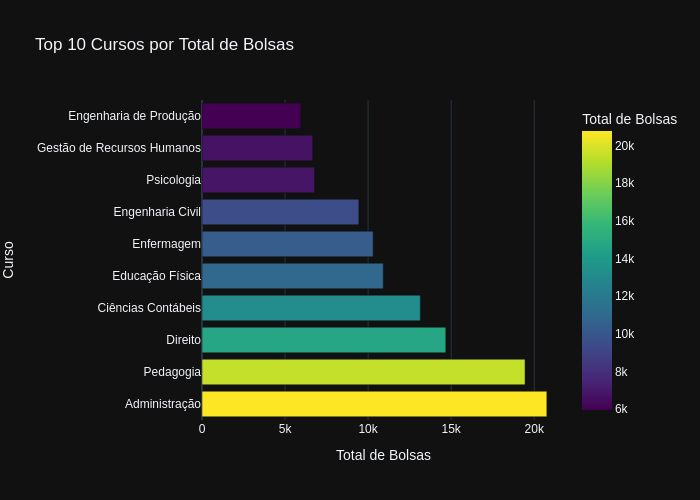

In [21]:
import plotly.express as px
top10_cursos = grouped_df.sort_values(by='total_bolsas', ascending=False).head(10)

fig = px.bar(top10_cursos, x='total_bolsas', y='curso_busca', orientation='h',
             title='Top 10 Cursos por Total de Bolsas',
             labels={'total_bolsas': 'Total de Bolsas', 'curso_busca': 'Curso'},
             template='plotly_dark',
             color='total_bolsas', color_continuous_scale='viridis')

# Verifique se o diretório 'images' existe, se não, crie-o
if not os.path.exists("images"):
    os.mkdir("images")

fig.write_image("images/top 10 cursos.png")

# Imprimir mensagem de sucesso
fig.show()

from IPython.display import Image
caminho_imagem = "images/top 10 cursos.png"
Image(filename=caminho_imagem)

**Relação entre Valor de Mensalidade e Total de Bolsas:**

Observa-se que cursos com mensalidades mais altas (como Direito e Engenharia Civil) geralmente têm menos bolsas disponíveis.
Isso pode ser explicado pela demanda e oferta: cursos mais caros podem atrair menos estudantes, resultando em menos bolsas disponíveis.
No entanto, essa relação não é linear, pois cursos como Administração e Educação Física têm muitas bolsas, apesar de mensalidades mais baixas.
Em resumo, há uma relação complexa entre o valor da mensalidade e o total de bolsas, o que pode ser influenciada por diversos fatores, como: área de estudo, a reputação do curso e a demanda dos estudantes.

### ***Q3 - Quais são os cursos tecnológicos do estado da Paraíba que oferecem mais bolsas de estudo e quantas bolsas de cada tipo estes cursos oferecem?***

In [22]:
merged['bolsa_integral_cotas'] = pd.to_numeric(merged['bolsa_integral_cotas'], errors='coerce').fillna(0).astype(int)
merged['bolsa_integral_ampla'] = pd.to_numeric(merged['bolsa_integral_ampla'], errors='coerce').fillna(0).astype(int)
merged['bolsa_parcial_cotas'] = pd.to_numeric(merged['bolsa_parcial_cotas'], errors='coerce').fillna(0).astype(int)
merged['bolsa_parcial_ampla'] = pd.to_numeric(merged['bolsa_parcial_ampla'], errors='coerce').fillna(0).astype(int)

# Filtra o DataFrame para cursos tecnológicos no estado da Paraíba
tech_courses_pb = merged[(merged['grau'] == 'Tecnológico') & (merged['uf_busca'] == 'PB')]

# Agrupa por nome do curso e somar o número de cada tipo de bolsa
grouped_tech_courses = tech_courses_pb.groupby('curso_busca').agg({
    'bolsa_integral_cotas': 'sum',
    'bolsa_integral_ampla': 'sum',
    'bolsa_parcial_cotas': 'sum',
    'bolsa_parcial_ampla': 'sum'
}).reset_index()

# Calcula o número total de bolsas para cada curso
grouped_tech_courses['total_bolsas'] = (
    grouped_tech_courses['bolsa_integral_cotas'] +
    grouped_tech_courses['bolsa_integral_ampla'] +
    grouped_tech_courses['bolsa_parcial_cotas'] +
    grouped_tech_courses['bolsa_parcial_ampla']
).astype(int)

# Ordena os cursos pelo número total de bolsas em ordem decrescente
sorted_tech_courses = grouped_tech_courses.sort_values(by='total_bolsas', ascending=False)

sorted_tech_courses_styled = sorted_tech_courses.style.set_properties(**{'text-align': 'center', 'width': '300px'}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center')]),
     dict(selector='caption', props=[('font-size', '16px'), ('font-weight', 'bold')])]
).set_caption("Cursos Tecnológicos na Paraíba por Total de Bolsas")

sorted_tech_courses_styled.set_table_attributes('style="width:100%;"')
sorted_tech_courses_styled

,curso_busca,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,total_bolsas
20,Gestão de Recursos Humanos,31,20,3,70,124
32,Segurança no Trabalho,11,7,1,91,110
30,Redes de Computadores,16,10,0,80,106
18,Gestão da Tecnologia da Informação,12,6,1,80,99
26,Negócios Imobiliários,6,4,0,85,95
24,Logística,9,3,1,67,80
29,Radiologia,12,30,1,10,53
5,Design de Interiores,13,10,0,30,53
25,Marketing,15,8,4,0,27
12,Gestão Comercial,14,5,5,3,27


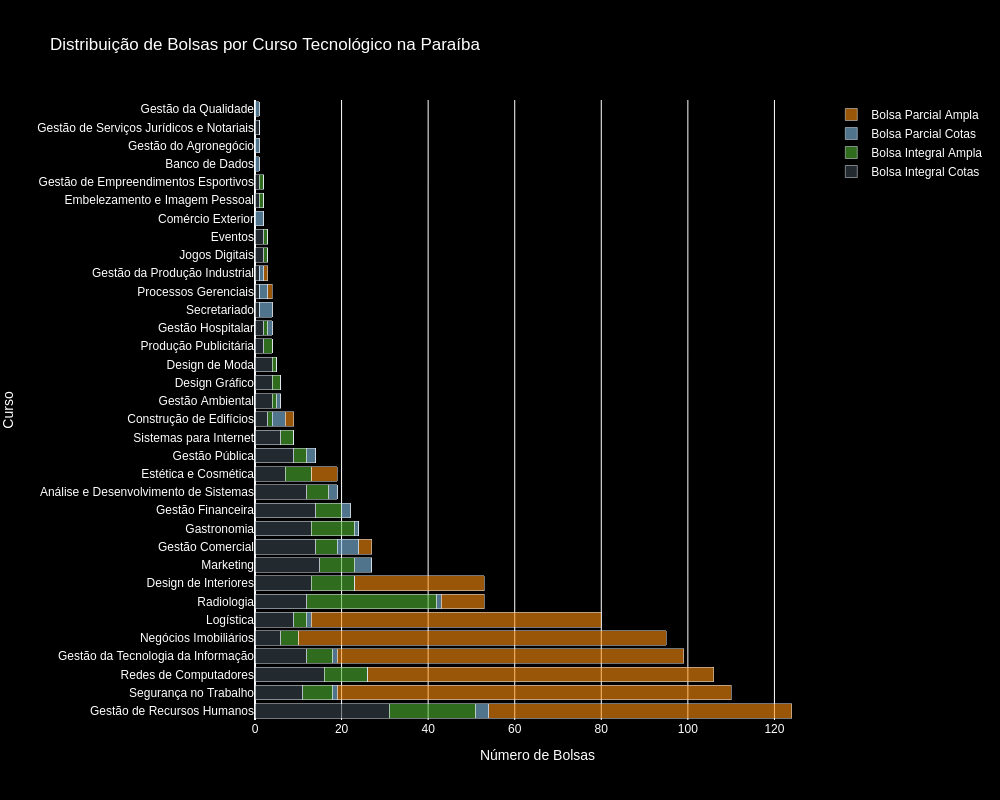

In [23]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Bar(
    y=sorted_tech_courses['curso_busca'],
    x=sorted_tech_courses['bolsa_integral_cotas'],
    name='Bolsa Integral Cotas',
    orientation='h',
    marker=dict(color='rgba(58, 71, 80, 0.6)')
))
fig.add_trace(go.Bar(
    y=sorted_tech_courses['curso_busca'],
    x=sorted_tech_courses['bolsa_integral_ampla'],
    name='Bolsa Integral Ampla',
    orientation='h',
    marker=dict(color='rgba(80, 180, 50, 0.6)')
))
fig.add_trace(go.Bar(
    y=sorted_tech_courses['curso_busca'],
    x=sorted_tech_courses['bolsa_parcial_cotas'],
    name='Bolsa Parcial Cotas',
    orientation='h',
    marker=dict(color='rgba(133, 193, 233, 0.6)')
))
fig.add_trace(go.Bar(
    y=sorted_tech_courses['curso_busca'],
    x=sorted_tech_courses['bolsa_parcial_ampla'],
    name='Bolsa Parcial Ampla',
    orientation='h',
    marker=dict(color='rgba(255, 144, 14, 0.6)')
))

fig.update_layout(
    barmode='stack',
    title='Distribuição de Bolsas por Curso Tecnológico na Paraíba',
    xaxis_title='Número de Bolsas',
    yaxis_title='Curso',
    width=1000,
    height=800,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
# Verifique se o diretório 'images' existe, se não, crie-o
if not os.path.exists("images"):
    os.mkdir("images")

fig.write_image("images/bolsa por curso.png")
fig.show()
from IPython.display import Image
caminho_imagem = "images/bolsa por curso.png"
Image(filename=caminho_imagem)


### ***Q4 - Considerando os cursos de Ciência da Computação, Engenharia da Computação e Sistemas de Informação, qual o percentual de bolsas ofertadas para cada modalidade (a distância, integral, noturno, etc.) por cada um dos cursos? Existe uma modalidade que é predominante?***

In [24]:
merged['curso_busca'] = merged['curso_busca'].replace('Ciências da Computação', 'Ciência da Computação')

# Filtra o DataFrame para os cursos de interesse
selected_courses = merged[merged['curso_busca'].isin(['Ciência da Computação', 'Engenharia da Computação', 'Sistemas de Informação'])]

# Agrupa por nome do curso e modalidade, e soma o número de bolsas para cada grupo
grouped_courses = selected_courses.groupby(['curso_busca', 'turno']).agg({
    'bolsa_integral_cotas': 'sum',
    'bolsa_integral_ampla': 'sum',
    'bolsa_parcial_cotas': 'sum',
    'bolsa_parcial_ampla': 'sum'
}).reset_index()

grouped_courses = grouped_courses.rename(columns={
    'bolsa_integral_cotas': 'b_integral_cotas',
    'bolsa_integral_ampla': 'b_integral_ampla',
    'bolsa_parcial_cotas': 'b_parcial_cotas',
    'bolsa_parcial_ampla': 'b_parcial_ampla'
})

# Calcula o número total de bolsas para cada grupo
grouped_courses['total_bolsas'] = (
    grouped_courses['b_integral_cotas'] +
    grouped_courses['b_integral_ampla'] +
    grouped_courses['b_parcial_cotas'] +
    grouped_courses['b_parcial_ampla']
)

# Calcula o total de bolsas para cada curso
total_bolsas_per_course = grouped_courses.groupby('curso_busca')['total_bolsas'].sum().reset_index()

# Calcula o percentual de bolsas para cada modalidade por curso
grouped_courses = grouped_courses.merge(total_bolsas_per_course, on='curso_busca', suffixes=('', '_total'))
grouped_courses['percentual_bolsas'] = (grouped_courses['total_bolsas'] / grouped_courses['total_bolsas_total']) * 100

grouped_courses['percentual_bolsas'] = grouped_courses['percentual_bolsas'].apply(lambda x: f"{x:.2f}")
grouped_courses = grouped_courses.drop(columns=['total_bolsas_total'])

# Ordena os cursos pelo maior percentual de bolsas dentro de cada curso
grouped_courses_sorted = pd.concat([
    grouped_courses[grouped_courses['curso_busca'] == 'Ciência da Computação'].sort_values(by='percentual_bolsas', ascending=False),
    grouped_courses[grouped_courses['curso_busca'] == 'Engenharia da Computação'].sort_values(by='percentual_bolsas', ascending=False),
    grouped_courses[grouped_courses['curso_busca'] == 'Sistemas de Informação'].sort_values(by='percentual_bolsas', ascending=False)
])

grouped_courses_styled = grouped_courses_sorted.style.set_properties(**{'text-align': 'center', 'width': '300px'}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center')]),
     dict(selector='caption', props=[('font-size', '16px'), ('font-weight', 'bold')])]
).set_caption("Percentual de Bolsas Ofertadas por Modalidade e Curso")
grouped_courses_styled.set_table_attributes('style="width:100%;"')
grouped_courses_styled

,curso_busca,turno,b_integral_cotas,b_integral_ampla,b_parcial_cotas,b_parcial_ampla,total_bolsas,percentual_bolsas
2,Ciência da Computação,Noturno,183,383,25,642,1233,72.23
1,Ciência da Computação,Matutino,112,143,9,173,437,25.60
0,Ciência da Computação,Integral,3,9,0,8,20,1.17
3,Ciência da Computação,Vespertino,4,5,0,8,17,1.00
6,Engenharia da Computação,Noturno,10,24,2,44,80,66.12
4,Engenharia da Computação,Integral,0,2,0,20,22,18.18
5,Engenharia da Computação,Matutino,4,12,0,3,19,15.70
9,Sistemas de Informação,Noturno,204,384,68,858,1514,78.65
7,Sistemas de Informação,Curso a Distância,59,34,1,1,95,4.94
10,Sistemas de Informação,Vespertino,1,1,3,51,56,2.91


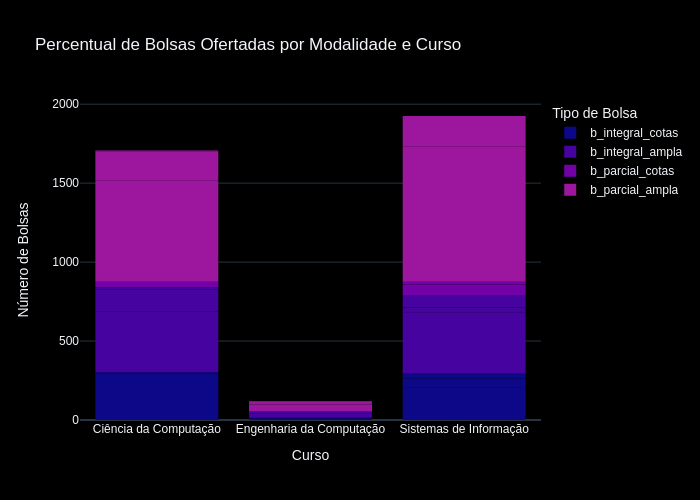

In [25]:
import plotly.express as px

# Definir uma paleta de cores roxo-azul
nova_paleta_cores = px.colors.sequential.Plasma

fig = px.bar(
    grouped_courses_sorted,
    x='curso_busca',
    y=['b_integral_cotas', 'b_integral_ampla', 'b_parcial_cotas', 'b_parcial_ampla'],
    labels={
        'curso_busca': 'Curso',
        'value': 'Número de Bolsas',
        'variable': 'Tipo de Bolsa'
    },
    title='Percentual de Bolsas Ofertadas por Modalidade e Curso',
    template='plotly_dark',
    color_discrete_sequence=nova_paleta_cores
)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(title='Curso'),
    yaxis=dict(title='Número de Bolsas'),
    legend_title_text='Tipo de Bolsa'
)

fig.update_traces(
    marker=dict(
        line=dict(width=0)
    )
)
# Verifique se o diretório 'images' existe, se não, crie-o
if not os.path.exists("images"):
    os.mkdir("images")

fig.write_image("images/bolsa modalidade.png")

# Imprimir mensagem de sucesso
fig.show()

from IPython.display import Image
caminho_imagem = "images/bolsa modalidade.png"
Image(filename=caminho_imagem)

Analisando os dados, é possível identificar uma tendência na distribuição das bolsas por modalidade para cada um dos cursos listados, a saber:

- **Ciência da Computação**: A modalidade **Noturno** é claramente predominante, com **72.23%** das bolsas ofertadas.
- **Engenharia da Computação**: Novamente, a modalidade **Noturno** se destaca com **66.12%** das bolsas.
- **Sistemas de Informação**: A modalidade **Noturno** tem a maior porcentagem, com **78.65%** das bolsas.

Com base nesses números, pode-se concluir que a modalidade **Noturno** é a predominante em todos os três cursos analisados. Isso pode sugerir, por exemplo,  que há uma maior oferta de bolsas para estudantes que preferem ou necessitam estudar a noite.